<a href="https://colab.research.google.com/github/amitkml/EIPP4-DeepLearning-Projects/blob/master/Assignment2-NetworkFineTune/EIP_4_P1_Assignment_2_NINTH_ITTER_DNN_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


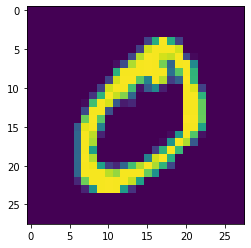

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

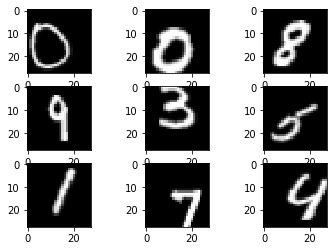

In [19]:
# Random Shifts
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

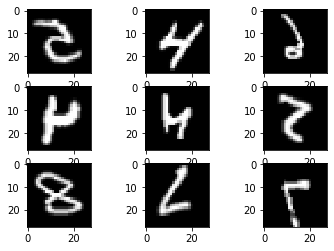

In [20]:

# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
														               zoom_range=0.08)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [0]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [24]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# from keras.layers import Activation
# model = Sequential()
 
# model.add(SeparableConv2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(64, 3, 3, activation='relu')) #24
# model.add(BatchNormalization())
# model.add(Dropout(0.1))

# model.add(Convolution2D(10, 1, 1, activation='relu')) #22

# model.add(MaxPooling2D(pool_size=(2, 2)))#11

# model.add(SeparableConv2D(16, 3, 3, activation='relu'))#9
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(SeparableConv2D(16, 3, 3, activation='relu'))#7
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(SeparableConv2D(16, 3, 3, activation='relu'))#5
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(16, 3, 3, activation='relu'))#3
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Convolution2D(10, 4, 4))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))


# model.add(Flatten())
# model.add(Activation('softmax'))


# model.summary()

In [26]:


from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(8, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [27]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0032 * 1/(1 + 0.319 * epoch), 10)

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]


model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0032), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, 
          verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0032.
60000/60000 [==============================] - 9s 153us/step - loss: 0.5335 - acc: 0.8471 - val_loss: 0.0869 - val_acc: 0.9841

Epoch 00001: val_acc improved from -inf to 0.98410, saving model to weights.best.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0024260804.
60000/60000 [==============================] - 7s 118us/step - loss: 0.2503 - acc: 0.9250 - val_loss: 0.0612 - val_acc: 0.9873

Epoch 00002: val_acc improved from 0.98410 to 0.98730, saving model to weights.best.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.001953602.
60000/60000 [==============================] - 7s 116us/step - loss: 0.1979 - acc: 0.9395 - val_loss: 0.0420 - val_acc: 0.9910

Epoch 00003: val_acc improved from 0.98730 to 0.99100, saving model to weights.best.hdf5
Epoch 4/20

Epoch 00004: LearningRateScheduler sett

In [28]:
!ls -ltr

total 292
drwxr-xr-x 1 root root   4096 Nov 21 16:30 sample_data
-rw-r--r-- 1 root root 292840 Nov 22 17:47 weights.best.hdf5


In [0]:
model.load_weights('weights.best.hdf5')

In [30]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.020666322801448405, 0.9948]
